<AxesSubplot:>

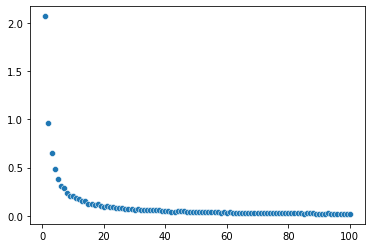

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

n_samples = 1000
variance = np.zeros(100)
for i in range(1, 101):
    samples = np.random.randint(1, 6, size=(n_samples, i))
    mean = np.mean(samples, axis=1)
    variance[i-1] = np.var(mean)

sns.scatterplot(np.arange(1, 101), variance)

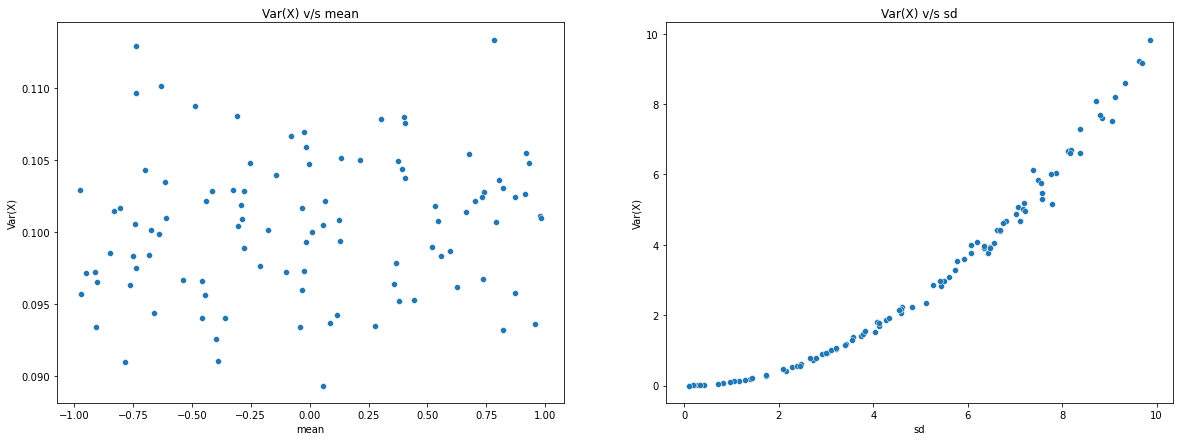

In [2]:
size = 100

variance_variable_mean = np.zeros(size+1)
variance_variable_sd = np.zeros(size+1)

var_mean_range = np.random.uniform(-1, 1, size+1)
var_sd_range = np.random.uniform(0, 10, size+1)

for id, i in enumerate(var_mean_range):
    # samples for variable mean and fixed sd
    samples_variable_mean = np.random.normal(loc=i, scale=1.0, size=(1000, 10))
    mean_variable_mean = np.mean(samples_variable_mean, axis=1)
    variance_variable_mean[id] = np.var(mean_variable_mean)

for id, i in enumerate(var_sd_range):
    # samples for fixed mean and variable sd
    samples_variable_sd = np.random.normal(loc=0.0, scale=i, size=(1000, 10))
    mean_variable_sd = np.mean(samples_variable_sd, axis=1)
    variance_variable_sd[id] = np.var(mean_variable_sd)

fig, axs = plt.subplots(figsize=(20, 7), ncols=2)

sns.scatterplot(var_mean_range, variance_variable_mean, ax=axs[0])
axs[0].title.set_text('Var(X) v/s mean')
axs[0].set_xlabel('mean')
axs[0].set_ylabel('Var(X)')

sns.scatterplot(var_sd_range, variance_variable_sd, ax=axs[1])
axs[1].title.set_text('Var(X) v/s sd')
axs[1].set_xlabel('sd')
axs[1].set_ylabel('Var(X)')

fig.show()

In [3]:
from scipy.stats import norm
from math import sqrt

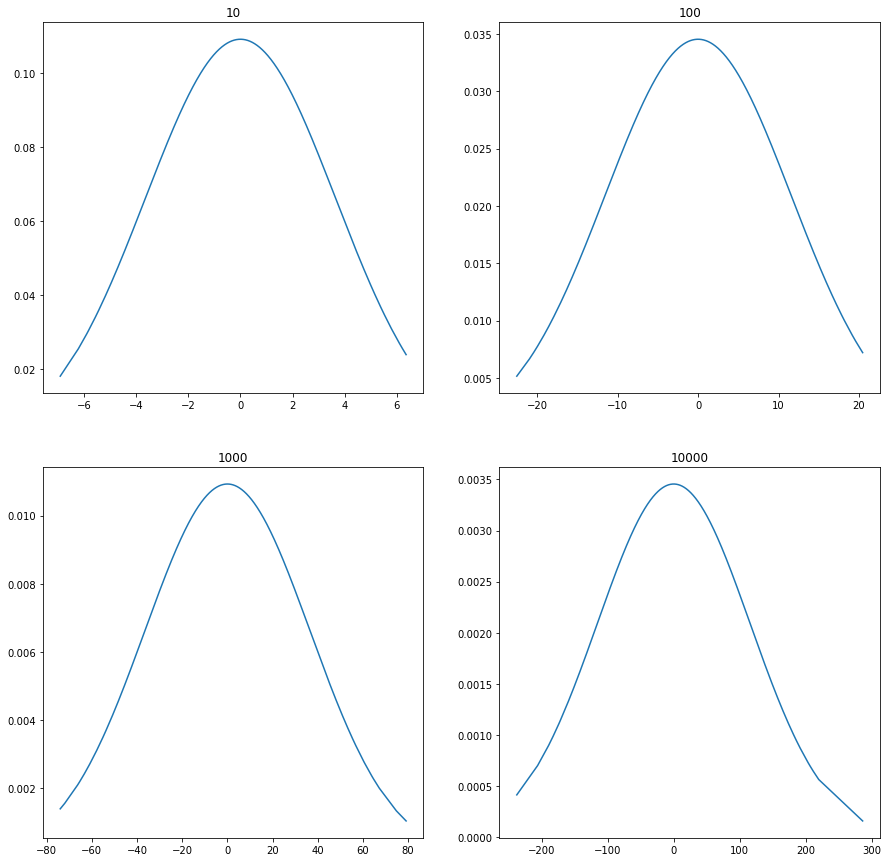

In [4]:
n = np.array([10, 100, 1000, 10000])
D_sum = np.empty(shape=(0, 0))

for size_idx in np.arange(n.shape[0]):
    D = np.random.uniform(-1, 1, size=(10000, n[size_idx]))
    if size_idx == 0:
        D_sum = np.sum(D, axis=1)
    else:
        D_sum = np.vstack([D_sum, np.sum(D, axis=1)])    

fig, axs = plt.subplots(figsize=(15, 15), nrows=2, ncols=2)
counter = 0
for i in np.arange(2):
    for j in np.arange(2):
        sns.lineplot(x=D_sum[counter,:], y=norm.pdf(D_sum[counter,:], (n[counter]*(-2+2)/2), (sqrt( ( (-2-2)**2)/12) )*sqrt(n[counter])), ax=axs[i, j])
        axs[i, j].set_title(f'{n[counter]}')
        counter += 1

# Chi Square test

### Using dice throw example

#### We know that the population mean of dice throws will be:
### $\frac{\sum_{i=1}^6 i}{6}$
Hence, $\mu$ = 3.5

#### We also know that Standard Deviation will be:
### $\sqrt{\frac{\sum_{i=1}^6(x_i - \mu)}{6-1}}$
Hence, $\sigma$ = 1.707825127659933

In [6]:
pop_mean = 3.5
pop_std = 1.707825127659933
pop_var = pop_std**2

In [22]:
samples = np.random.randint(1, 6+1, size=(1000, 3))
print(samples[:10])
samples.shape

[[3 6 4]
 [2 5 6]
 [6 1 5]
 [6 6 2]
 [4 2 2]
 [4 4 6]
 [3 3 2]
 [3 5 5]
 [4 6 5]
 [6 5 4]]


(1000, 3)

In [7]:
sample_mean_dist = np.mean(samples, axis=1)
sample_var_dist = np.var(samples, axis=1)
sample_std_dist = sample_var_dist**0.5

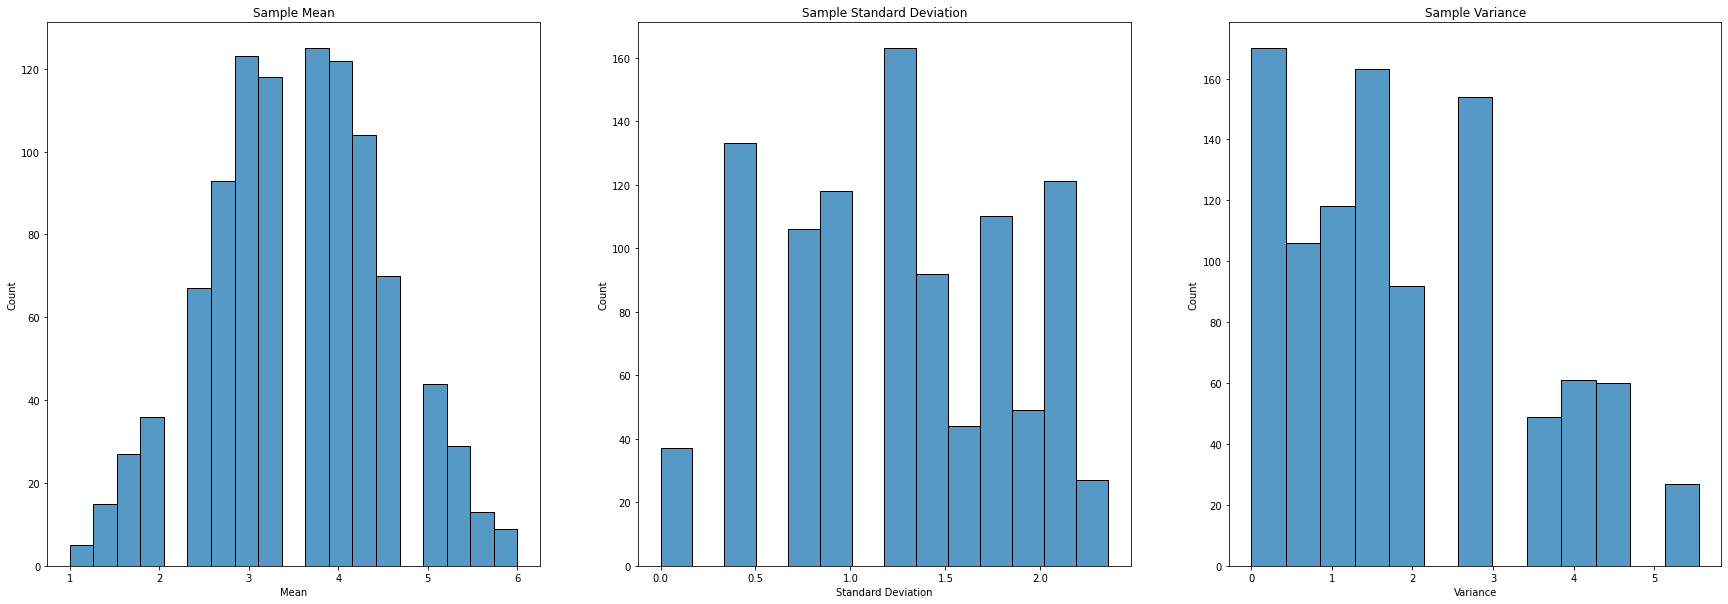

In [17]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=sample_mean_dist, ax=axs[0])
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=sample_std_dist, ax=axs[1])
axs[1].set_title('Sample Standard Deviation')
axs[1].set_xlabel('Standard Deviation')
sns.histplot(x=sample_var_dist, ax=axs[2])
axs[2].set_title('Sample Variance')
axs[2].set_xlabel('Variance');


From *Central Limit Theorem*, we already knew that the sample means distribution will be a **Normal Distribution**
<br>Now, We have to gain insights about the ***sample variance distribution*** 
<br><br>
#### But, first lets see the whether the below given relation  holds or not: 
$E[S^2] = \sigma^2$

In [18]:
expected_sample_variance = np.mean(sample_var_dist)
expected_sample_variance

1.9395555555555557

In [19]:
pop_var

2.9166666666666665

We can see that the difference between $\sigma^2$ and $E[S^2]$ is very huge.<br>But,we cannot say for sure since we tried this using only 1000 samples.<br>Let's, try this using $10^6$ samples.

In [21]:
large_samples = np.random.randint(1, 6+1, size=(10**6, 3))
print(large_samples[:10])
large_samples.shape 

[[6 6 1]
 [4 4 6]
 [6 3 2]
 [3 5 3]
 [4 5 6]
 [6 1 2]
 [2 1 6]
 [5 5 3]
 [1 2 4]
 [4 3 5]]


(1000000, 3)

In [23]:
large_sample_mean_dist = np.mean(large_samples, axis=1)
large_sample_var_dist = np.var(large_samples, axis=1)
large_sample_std_dist = large_sample_var_dist**0.5

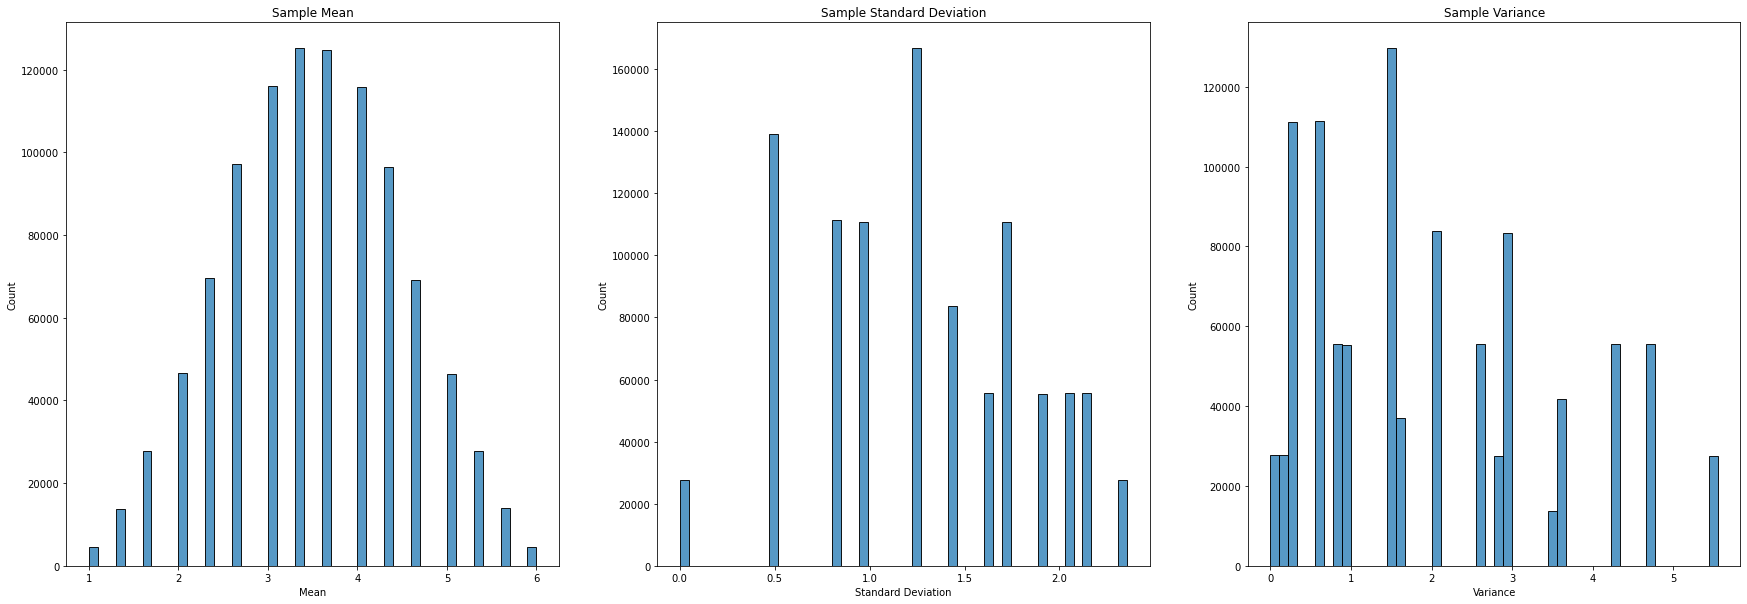

In [29]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=large_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=large_sample_std_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Standard Deviation')
axs[1].set_xlabel('Standard Deviation')
sns.histplot(x=large_sample_var_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Variance')
axs[2].set_xlabel('Variance');